In [15]:
import sqlite3
import pandas as pd
import threading
import multiprocessing
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def populate():
  dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COMPUTAÇÃO NEUROMÓRFICA/Checkpoint 1 - Semestre 2/Football Stadiums.csv', sep=',', encoding='latin-1')

  conexao = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/COMPUTAÇÃO NEUROMÓRFICA/Checkpoint 1 - Semestre 2/stadiums.db')

  conexao.execute('DELETE FROM stadiums')

  conexao.execute('''
      CREATE TABLE IF NOT EXISTS stadiums (
          Confederation VARCHAR,
          Stadium VARCHAR,
          City VARCHAR,
          HomeTeams VARCHAR,
          Capacity VARCHAR,
          Country VARCHAR,
          IOC VARCHAR
      )
  ''')

  for indice, linha in dados.iterrows():
      valores = tuple(linha)  # Converte a linha em uma tupla de valores
      valores = valores[1:]
      conexao.execute('INSERT INTO stadiums VALUES (?, ?, ?, ?, ?, ?, ?)', valores)

  conexao.commit()  # Salva as mudanças
  conexao.close()   # Fecha a conexão com o banco de dados


In [8]:
def read():
  conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/COMPUTAÇÃO NEUROMÓRFICA/Checkpoint 1 - Semestre 2/stadiums.db')
  cursor = conn.cursor()
  cursor.execute("SELECT * FROM stadiums")
  resultados = cursor.fetchall()
  conn.close()

  dados = []
  for linha in resultados:
    dados.append({"Confederation": linha[0], "Stadium": linha[1], "City": linha[2], "HomeTeams": linha[3], "Capacity": linha[4], "Country": linha[5], "IOC": linha[6]})

  print("Dados: ", dados)

In [9]:
def configure(data):
  Confederation = data['Confederation']
  Stadium = data['Stadium']
  City = data['City']
  HomeTeams = data['HomeTeams']
  Capacity = data['Capacity']
  Country = data['Country']
  IOC = data['IOC']

  conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/COMPUTAÇÃO NEUROMÓRFICA/Checkpoint 1 - Semestre 2/stadiums.db')
  conn.execute('INSERT INTO stadiums VALUES (?, ?, ?, ?, ?, ?, ?)', (Confederation, Stadium, City, HomeTeams, Capacity, Country, IOC))
  conn.commit()
  conn.close()

In [11]:
t0 = time.time()
obj = {'Confederation': 'teste', 'Stadium': 'teste', 'City': 'teste', 'HomeTeams': 'teste', 'Capacity': 'teste', 'Country': 'teste', 'IOC': 'teste'}

populate()
configure(obj)
read()
print(f"Tempo para retorno: {time.time() - t0}")

Dados:  [{'Confederation': 'UEFA', 'Stadium': 'Stadiumi Besëlidhja', 'City': 'Lezhë', 'HomeTeams': 'Besëlidhja', 'Capacity': '7000', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Flamurtari', 'City': 'Vlorë', 'HomeTeams': 'Flamurtari Vlorë', 'Capacity': '8200', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Laçi', 'City': 'Laçi', 'HomeTeams': 'KF Laçi', 'Capacity': '5000', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Niko Dovana', 'City': 'Durrës', 'HomeTeams': 'Teuta', 'Capacity': '12040', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Selman Stërmasi', 'City': 'Tirana', 'HomeTeams': 'KF Tirana, Dinamo, Partizani', 'Capacity': '9500', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Skënderbeu', 'City': 'Korçë', 'HomeTeams': 'Skënderbeu', 'Capacity': '7500', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confe

# Multiprocessing

In [12]:
t0 = time.time()
obj = {'Confederation': 'teste', 'Stadium': 'teste', 'City': 'teste', 'HomeTeams': 'teste', 'Capacity': 'teste', 'Country': 'teste', 'IOC': 'teste'}

if __name__ == "__main__":
  t1 = multiprocessing.Process(target=populate)
  t2 = multiprocessing.Process(target=configure, args=(obj,))
  t3 = multiprocessing.Process(target=read)

  t1.start()
  t2.start()
  t3.start()

  t1.join()
  t2.join()
  t3.join()

  print(f"Tempo para retorno: {time.time() - t0}")

Dados:  [{'Confederation': 'UEFA', 'Stadium': 'Stadiumi Besëlidhja', 'City': 'Lezhë', 'HomeTeams': 'Besëlidhja', 'Capacity': '7000', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Flamurtari', 'City': 'Vlorë', 'HomeTeams': 'Flamurtari Vlorë', 'Capacity': '8200', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Laçi', 'City': 'Laçi', 'HomeTeams': 'KF Laçi', 'Capacity': '5000', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Niko Dovana', 'City': 'Durrës', 'HomeTeams': 'Teuta', 'Capacity': '12040', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Selman Stërmasi', 'City': 'Tirana', 'HomeTeams': 'KF Tirana, Dinamo, Partizani', 'Capacity': '9500', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confederation': 'UEFA', 'Stadium': 'Stadiumi Skënderbeu', 'City': 'Korçë', 'HomeTeams': 'Skënderbeu', 'Capacity': '7500', 'Country': 'Albania', 'IOC': 'ALB'}, {'Confe

## Data analysis

In [13]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/COMPUTAÇÃO NEUROMÓRFICA/Checkpoint 1 - Semestre 2/Football Stadiums.csv",encoding="latin-1") #data import

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.No           1820 non-null   int64 
 1   Confederation  1820 non-null   object
 2   Stadium        1820 non-null   object
 3   City           1820 non-null   object
 4   HomeTeams      1820 non-null   object
 5   Capacity       1820 non-null   int64 
 6   Country        1820 non-null   object
 7   IOC            1820 non-null   object
dtypes: int64(2), object(6)
memory usage: 113.9+ KB


,S.No,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC
0,1,UEFA,Stadiumi Besëlidhja,Lezhë,Besëlidhja,7000,Albania,ALB
1,2,UEFA,Stadiumi Flamurtari,Vlorë,Flamurtari Vlorë,8200,Albania,ALB
2,3,UEFA,Stadiumi Laçi,Laçi,KF Laçi,5000,Albania,ALB
3,4,UEFA,Stadiumi Niko Dovana,Durrës,Teuta,12040,Albania,ALB
4,5,UEFA,Stadiumi Selman Stërmasi,Tirana,"KF Tirana, Dinamo, Partizani",9500,Albania,ALB


## Stadium Top 10 Capacity


In [14]:
df.sort_values(by="Capacity",ascending=False,inplace=True)
df2=df.head(10).copy()

<Axes: xlabel='Stadium', ylabel='Capacity'>

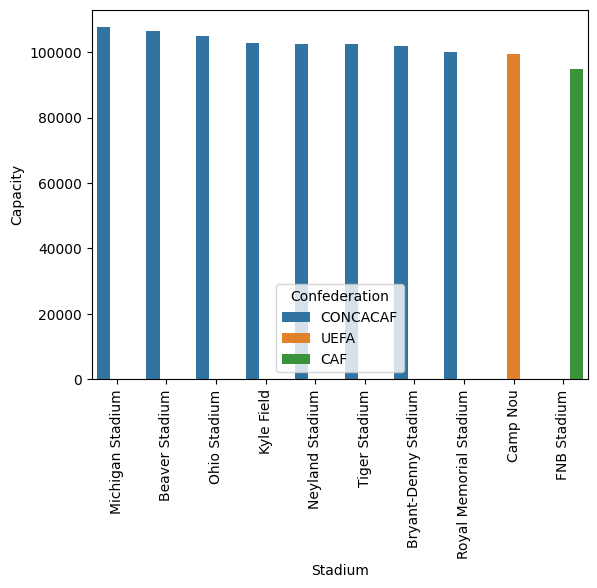

In [17]:
plt.xticks(rotation=90)
sns.barplot(data=df2,x="Stadium",y="Capacity",hue="Confederation")

<Axes: xlabel='Stadium', ylabel='Capacity'>

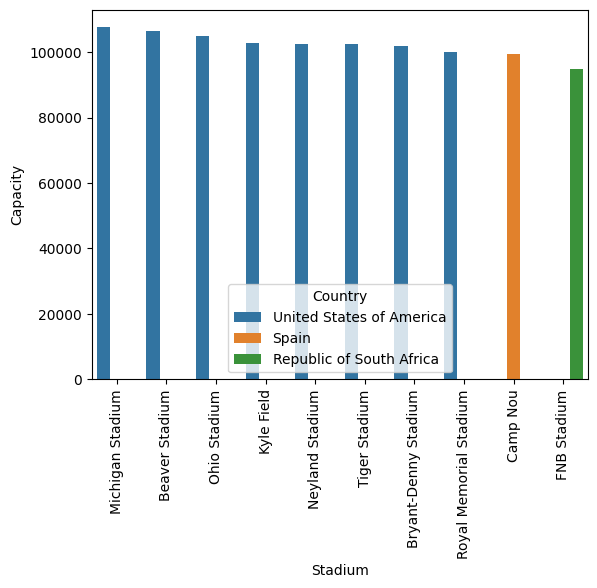

In [18]:
plt.xticks(rotation=90)
sns.barplot(data=df2,x="Stadium",y="Capacity",hue="Country")

<Axes: xlabel='Stadium', ylabel='Capacity'>

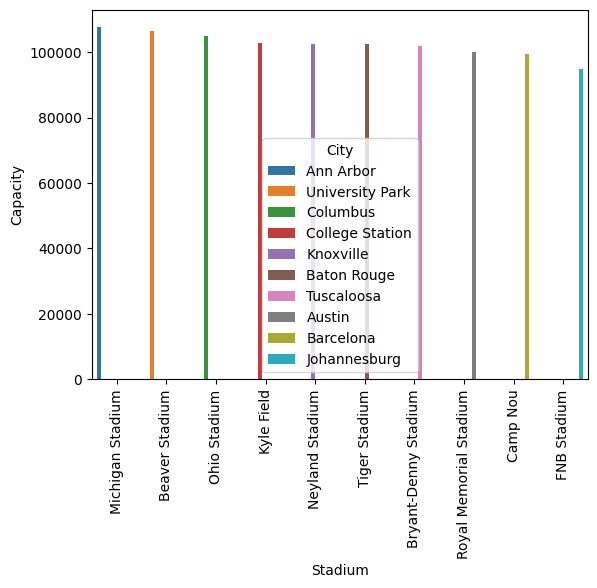

In [19]:
plt.xticks(rotation=90)
sns.barplot(data=df2,x="Stadium",y="Capacity",hue="City")

## Histograma de capacidade

<Axes: xlabel='Capacity', ylabel='Count'>

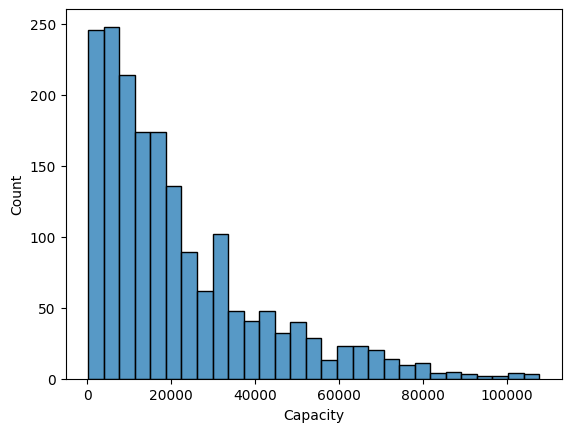

In [20]:
sns.histplot(data=df,x="Capacity")

## Modelo


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['Confederation', 'Stadium', 'City', 'Capacity', 'Country']]
y = df['IOC']

# Variáveis categóricas
label_encoders = {}
categorical_columns = ['Confederation', 'Stadium', 'City', 'Country']

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Desempenho do modelo usando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')


<ipython-input-24-a9c90a646632>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-24-a9c90a646632>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-24-a9c90a646632>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Acurácia do modelo: 0.8818681318681318
